File not found, downloading from internet...
Data loaded successfully from URL!

--- STARTING CLASSIFICATION (Predicting Fish Species) ---
Logistic Regression Accuracy: 0.94
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 0.91
Support Vector SVM Accuracy: 0.94
K-Nearest Neighbors Accuracy: 0.91
Naive Bayes Accuracy: 1.00

--- STARTING REGRESSION (Predicting Fish Weight) ---
Linear Regression -> MSE: 13728 | R2 Score: 0.90
Ridge Regression -> MSE: 15125 | R2 Score: 0.89
Lasso Regression -> MSE: 15301 | R2 Score: 0.89
Decision Tree -> MSE: 6750 | R2 Score: 0.95
Random Forest -> MSE: 3662 | R2 Score: 0.97
Support Vector SVM -> MSE: 155131 | R2 Score: -0.09
K-Nearest Neighbors -> MSE: 10257 | R2 Score: 0.93

--- GENERATING GRAPHS ---


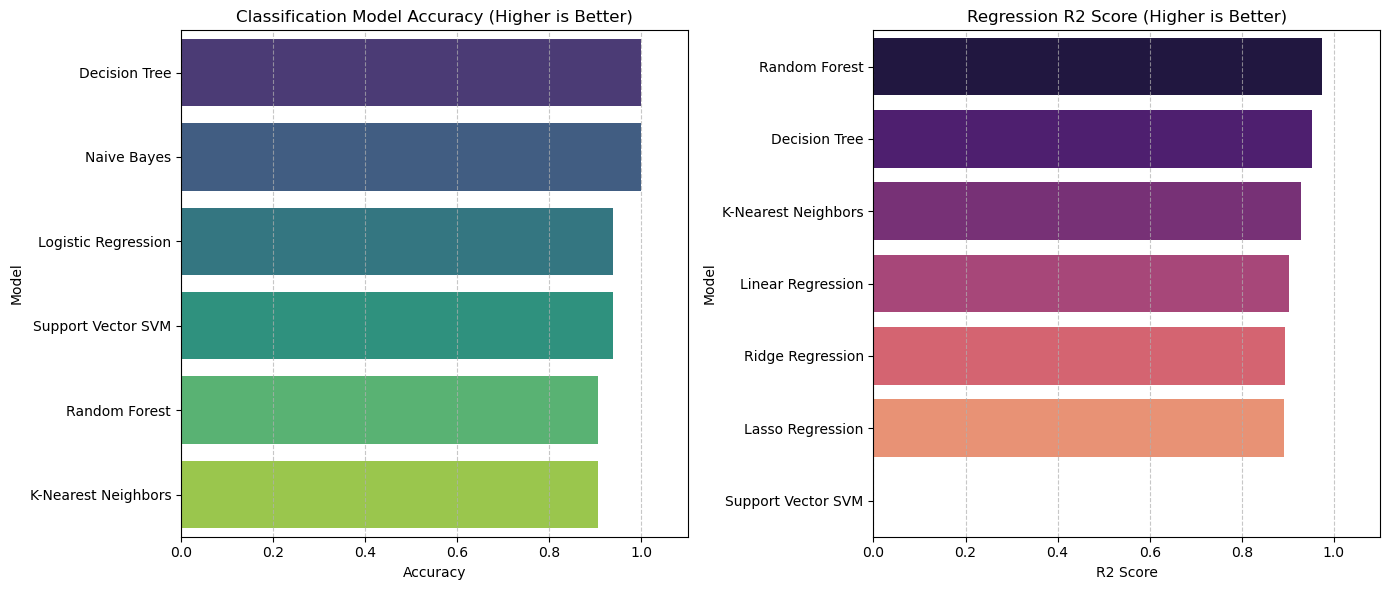

In [3]:
# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# --- STEP 2: LOAD DATA ---
try:
    data = pd.read_csv("Fish.csv")
    print("Data loaded successfully from file!")
except:
    print("File not found, downloading from internet...")
    data = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Fish.csv")
    print("Data loaded successfully from URL!")

# =====================================================
#                 CLASSIFICATION
# =====================================================
print("\n--- STARTING CLASSIFICATION (Predicting Fish Species) ---")

X_class = data.drop("Species", axis=1)
y_class = data["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

class_models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=2000))
    ]),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC())
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    "Naive Bayes": GaussianNB()
}

class_results = []

for name, model in class_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    class_results.append({"Model": name, "Accuracy": acc})
    print(f"{name} Accuracy: {acc:.2f}")

# =====================================================
#                 REGRESSION
# =====================================================
print("\n--- STARTING REGRESSION (Predicting Fish Weight) ---")

data_reg = data.copy()
encoder = LabelEncoder()
data_reg["Species"] = encoder.fit_transform(data_reg["Species"])

X_reg = data_reg.drop("Weight", axis=1)
y_reg = data_reg["Weight"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

reg_models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    "Lasso Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(max_iter=5000))
    ]),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ])
}

reg_results = []

for name, model in reg_models.items():
    model.fit(X_train_r, y_train_r)
    preds = model.predict(X_test_r)
    mse = mean_squared_error(y_test_r, preds)
    r2 = r2_score(y_test_r, preds)
    reg_results.append({"Model": name, "MSE": mse, "R2 Score": r2})
    print(f"{name} -> MSE: {mse:.0f} | R2 Score: {r2:.2f}")

# =====================================================
#                 VISUALIZATION
# =====================================================
print("\n--- GENERATING GRAPHS ---")

df_class = pd.DataFrame(class_results)
df_reg = pd.DataFrame(reg_results)

plt.figure(figsize=(14, 6))

# Classification Accuracy
plt.subplot(1, 2, 1)
sns.barplot(
    x="Accuracy",
    y="Model",
    hue="Model",
    data=df_class.sort_values("Accuracy", ascending=False),
    legend=False,
    palette="viridis"
)
plt.title("Classification Model Accuracy (Higher is Better)")
plt.xlim(0, 1.1)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Regression R2 Score
plt.subplot(1, 2, 2)
sns.barplot(
    x="R2 Score",
    y="Model",
    hue="Model",
    data=df_reg.sort_values("R2 Score", ascending=False),
    legend=False,
    palette="magma"
)
plt.title("Regression R2 Score (Higher is Better)")
plt.xlim(0, 1.1)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
